In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df = pd.read_csv('../data/train.csv')
df.shape

(137, 43)

In [34]:
test_df = pd.read_csv('../data/test.csv')
test_df.shape

(100000, 42)

In [35]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [36]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [37]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

display_all(df.head().transpose())

,0,1,2,3,4
Id,0,1,2,3,4
Open Date,07/17/1999,02/14/2008,03/09/2013,02/02/2012,05/09/2009
City,İstanbul,Ankara,Diyarbakır,Tokat,Gaziantep
City Group,Big Cities,Big Cities,Other,Other,Other
Type,IL,FC,IL,IL,IL
P1,4,4,2,6,3
P2,5.0,5.0,4.0,4.5,4.0
P3,4.0,4.0,2.0,6.0,3.0
P4,4.0,4.0,5.0,6.0,4.0
P5,2,1,2,4,2


In [38]:
df.isnull().sum().sort_index()/len(df)

City          0.0
City Group    0.0
Id            0.0
Open Date     0.0
P1            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
P16           0.0
P17           0.0
P18           0.0
P19           0.0
P2            0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P28           0.0
P29           0.0
P3            0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
Type          0.0
revenue       0.0
dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_21724\2964447247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.countplot(df['Type'],palette="Set2", ax=ax[0]);
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\2964447247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g2 = sns.countplot(test_df['Type'],palette="Set2", ax=ax[1]);
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\2964447247.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


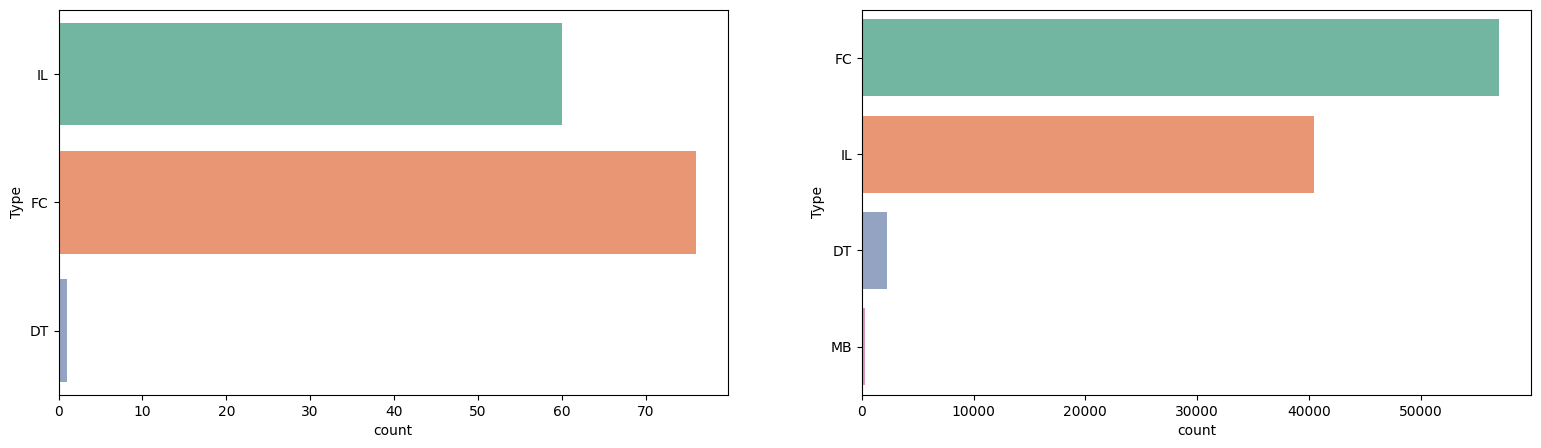

In [39]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['Type'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['Type'],palette="Set2", ax=ax[1]);
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21724\4215139422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\4215139422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\4215139422.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


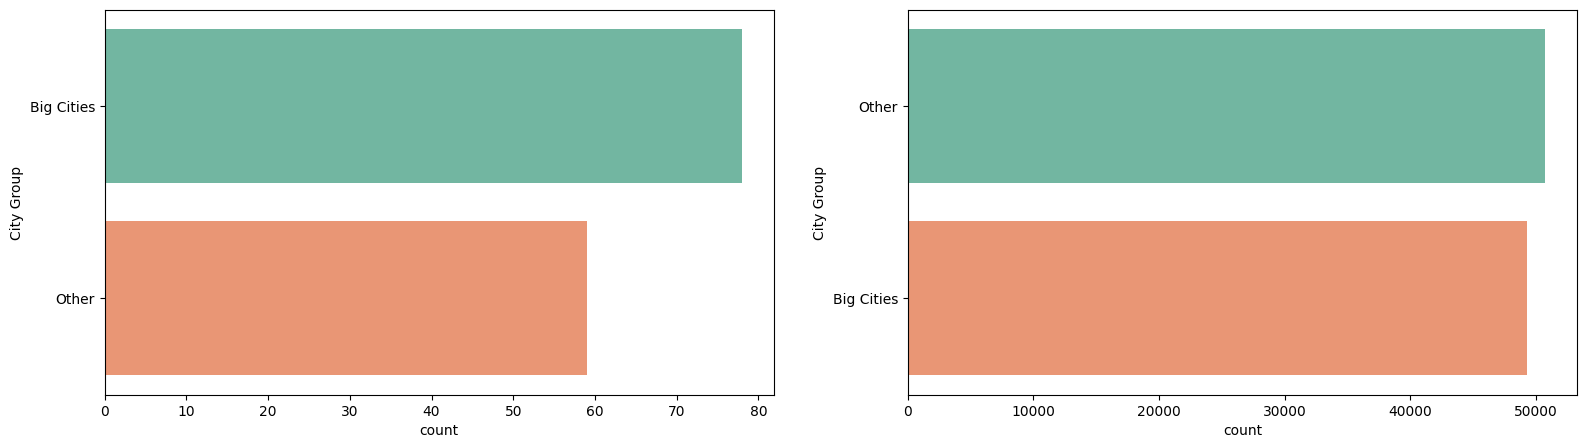

In [40]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);
fig.show()

In [41]:
(df['City'].nunique(), test_df['City'].nunique())

(34, 57)

In [42]:
test_df.loc[test_df['Type']=='MB', 'Type'] = 'DT'

In [43]:
df.drop('City', axis=1, inplace=True)
test_df.drop('City', axis=1, inplace=True)

In [44]:
import datetime
df.drop('Id',axis=1,inplace=True)
df['Open Date']  = pd.to_datetime(df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
df['Days Open'] = (launch_date - df['Open Date']).dt.days / 1000
test_df['Days Open'] = (launch_date - test_df['Open Date']).dt.days / 1000
df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21724\305055370.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False);
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\305055370.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(test_df['P{}'.format(i)],

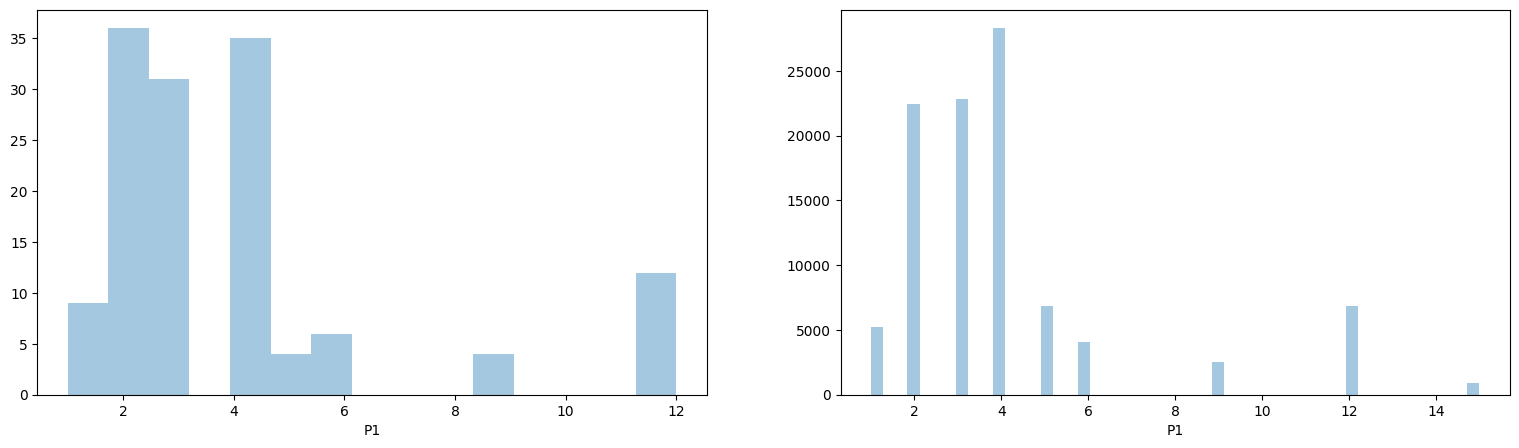

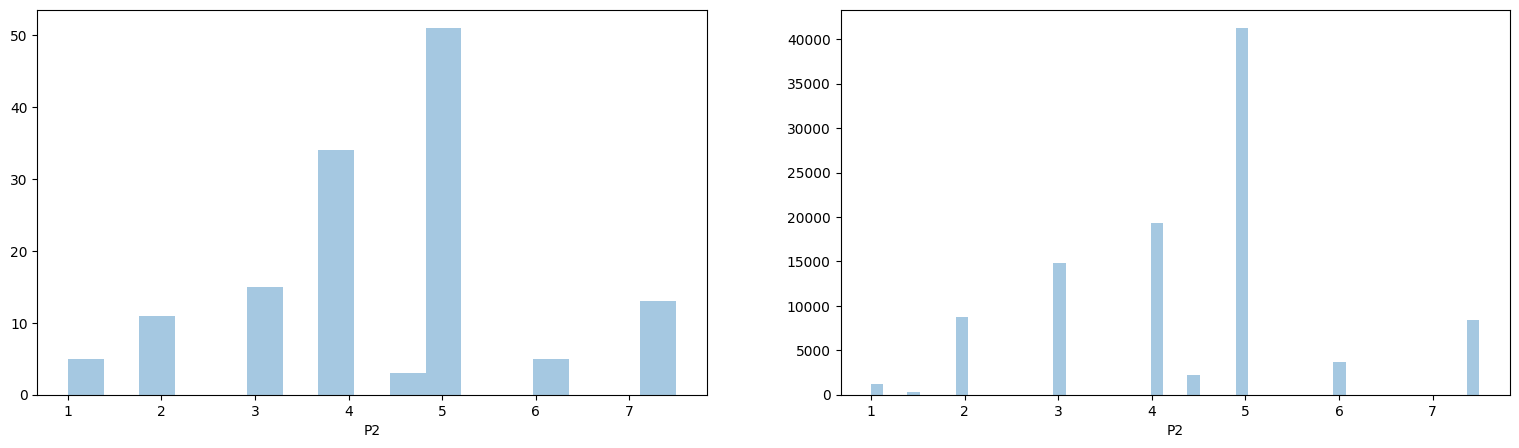

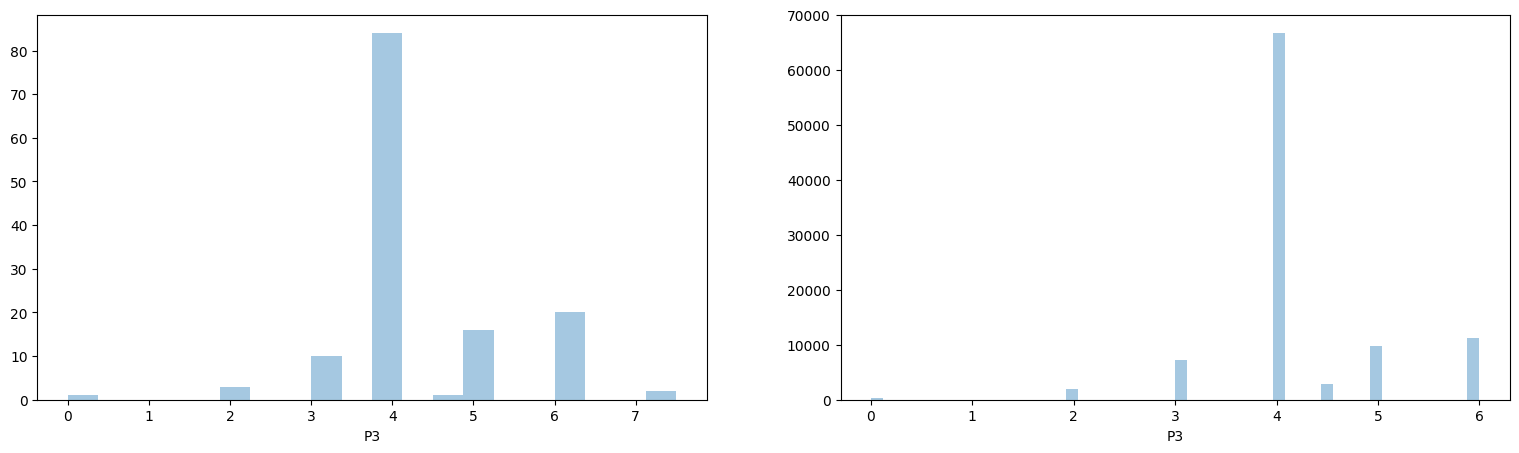

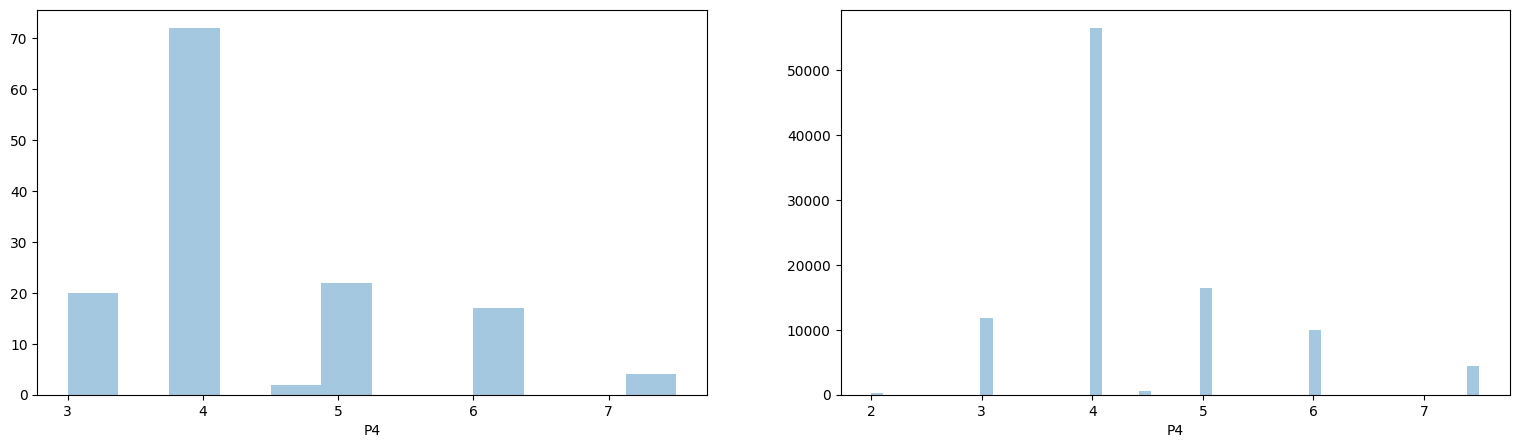

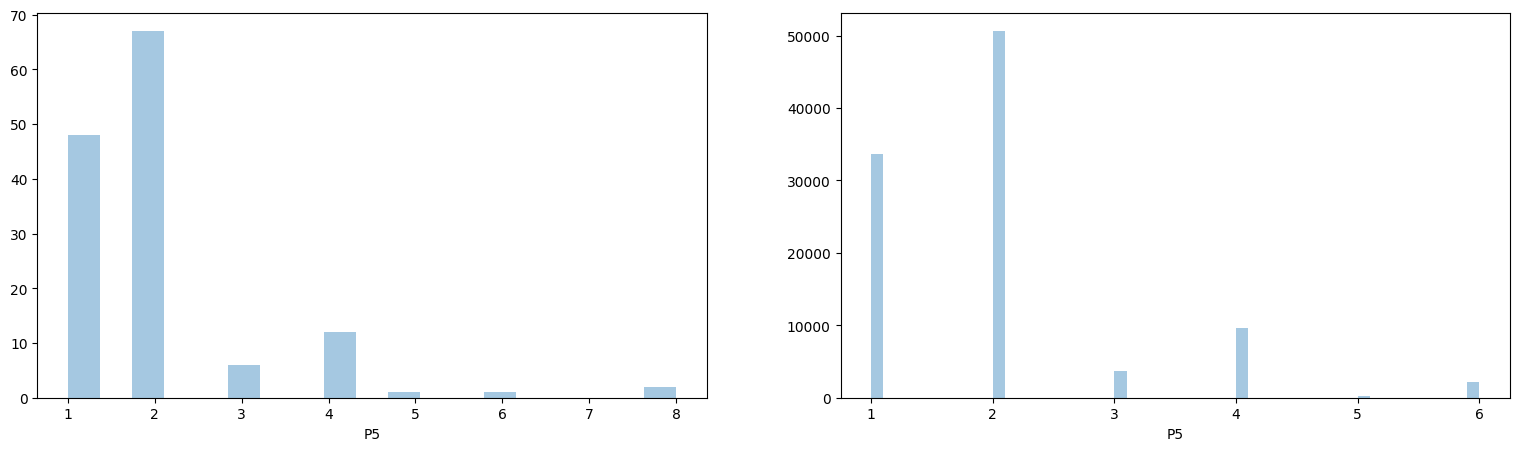

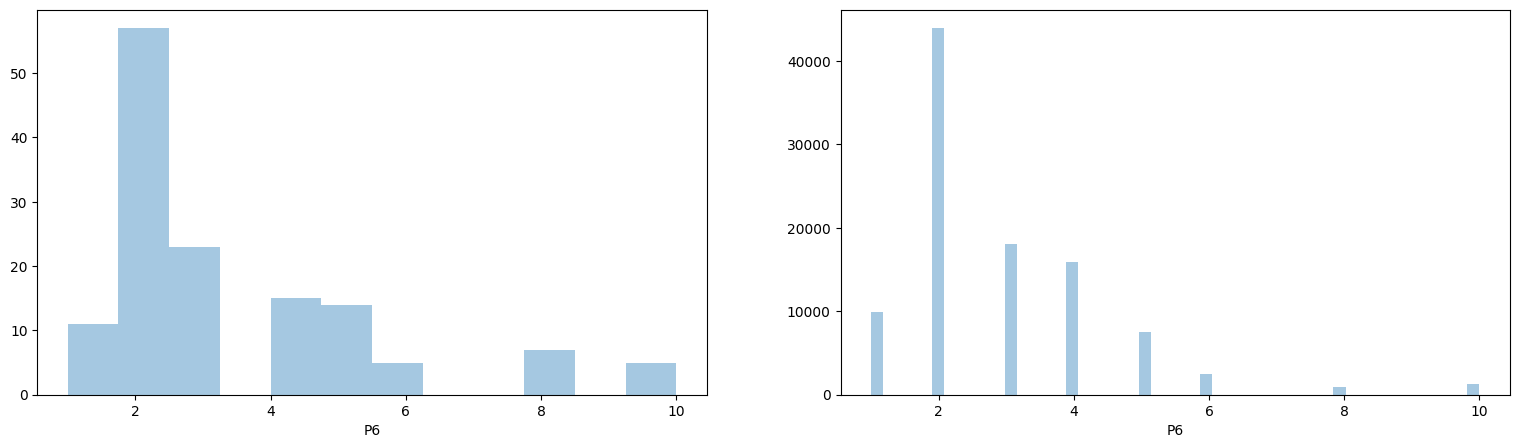

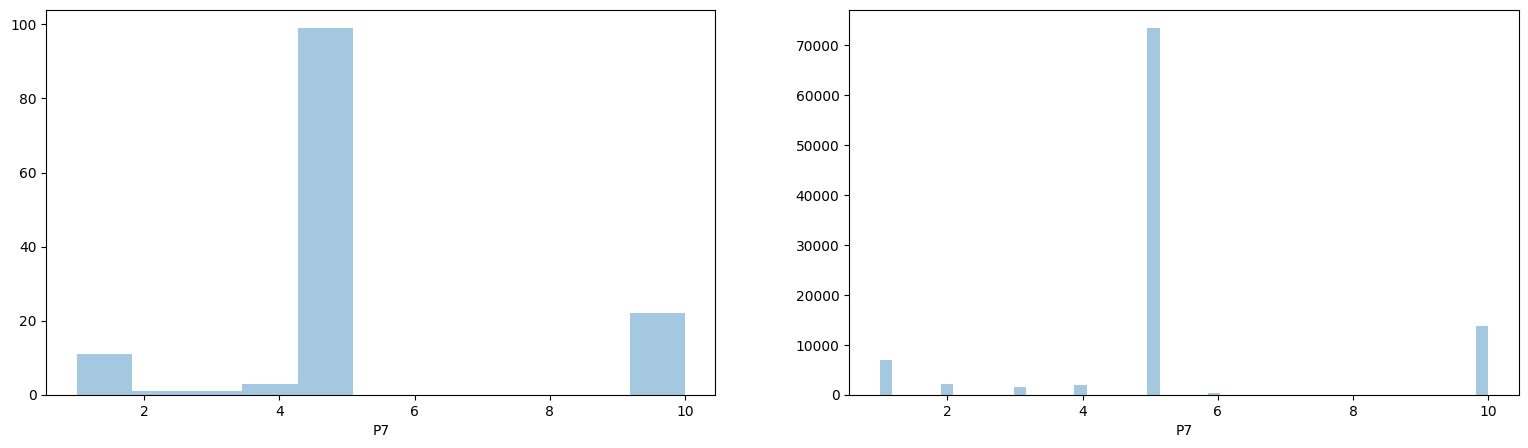

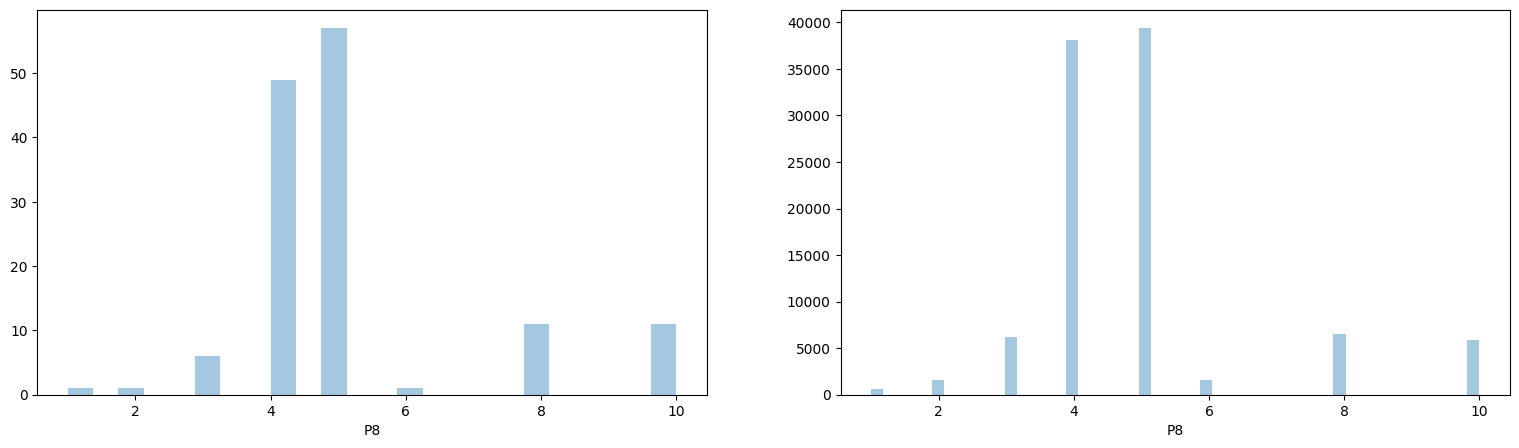

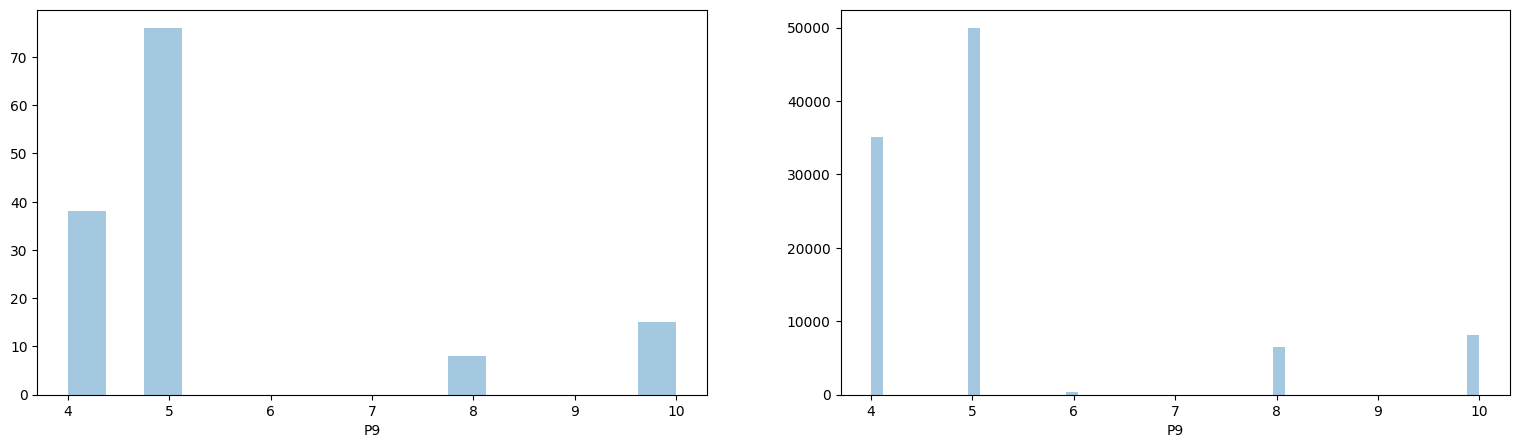

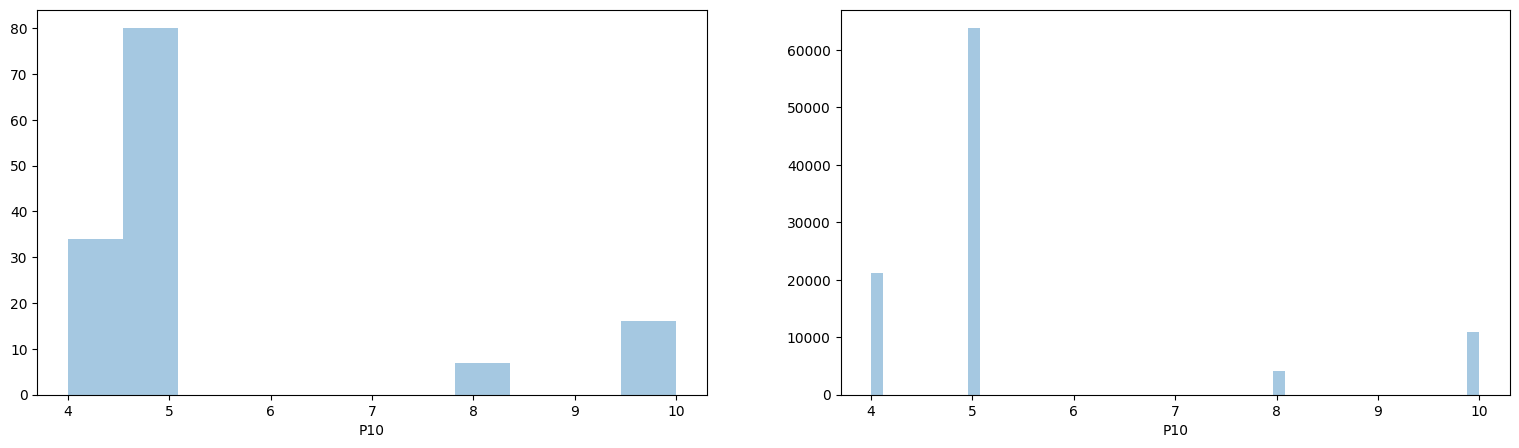

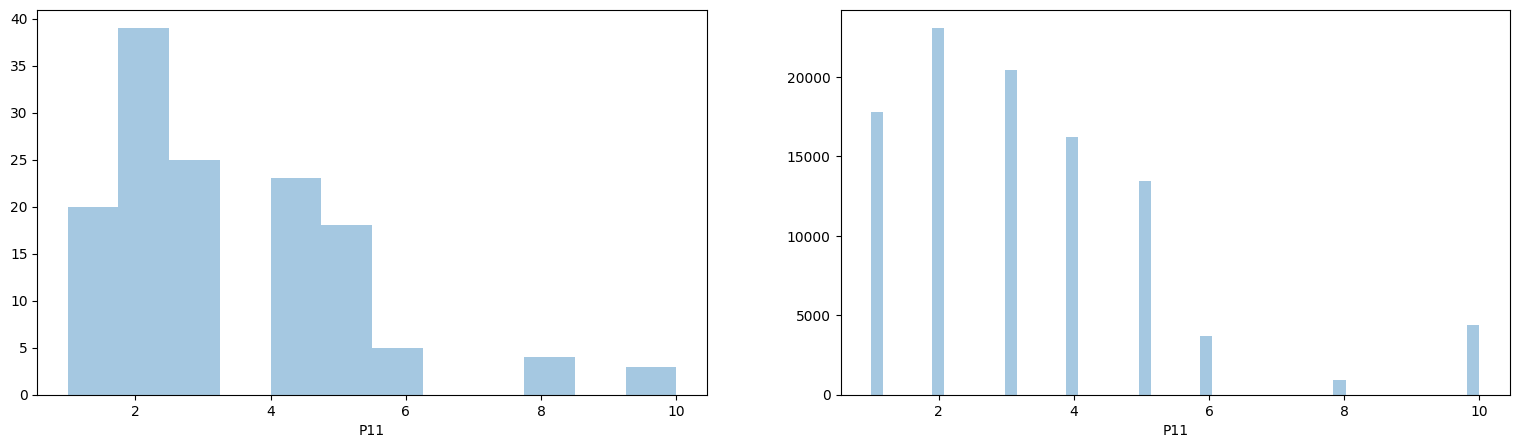

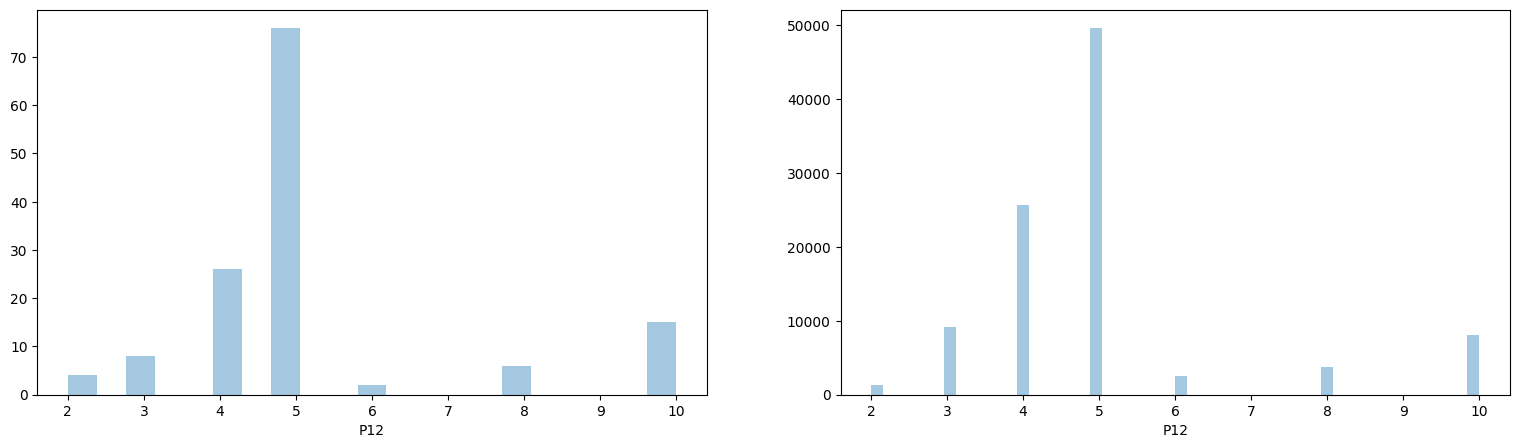

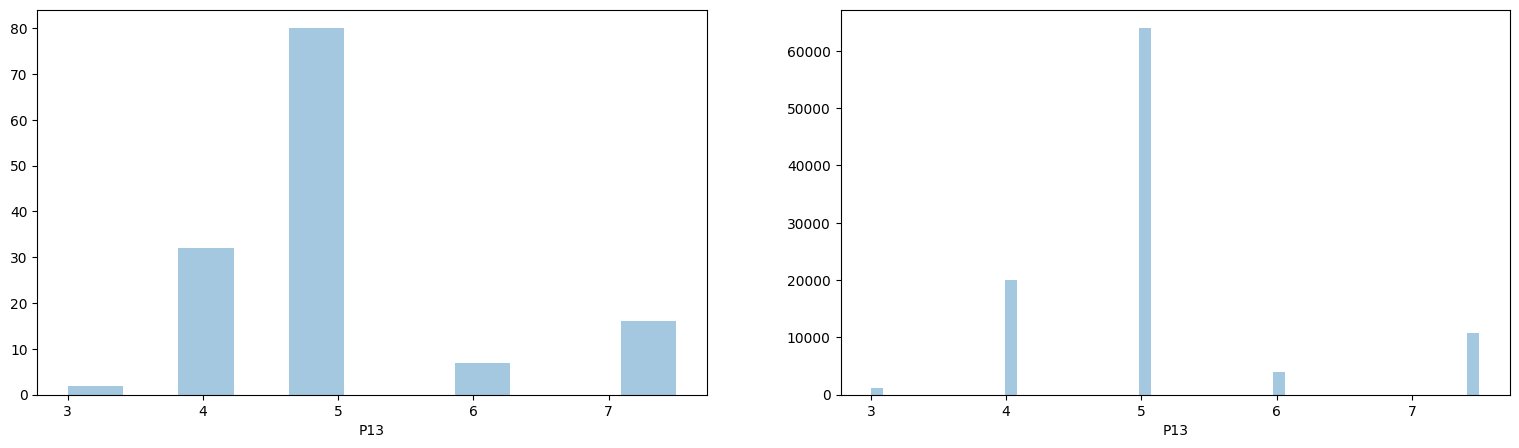

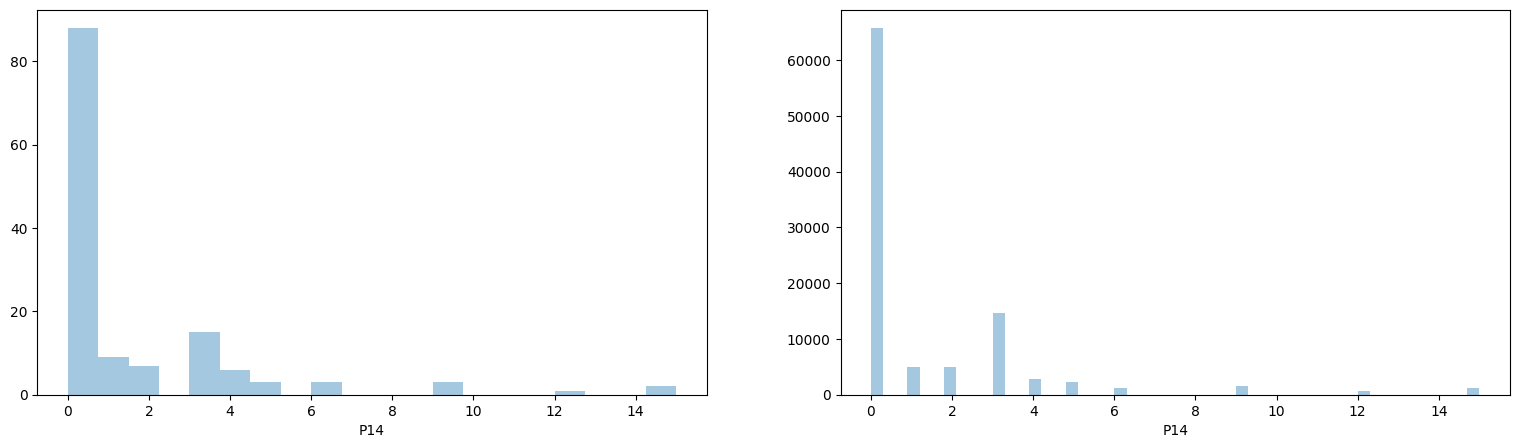

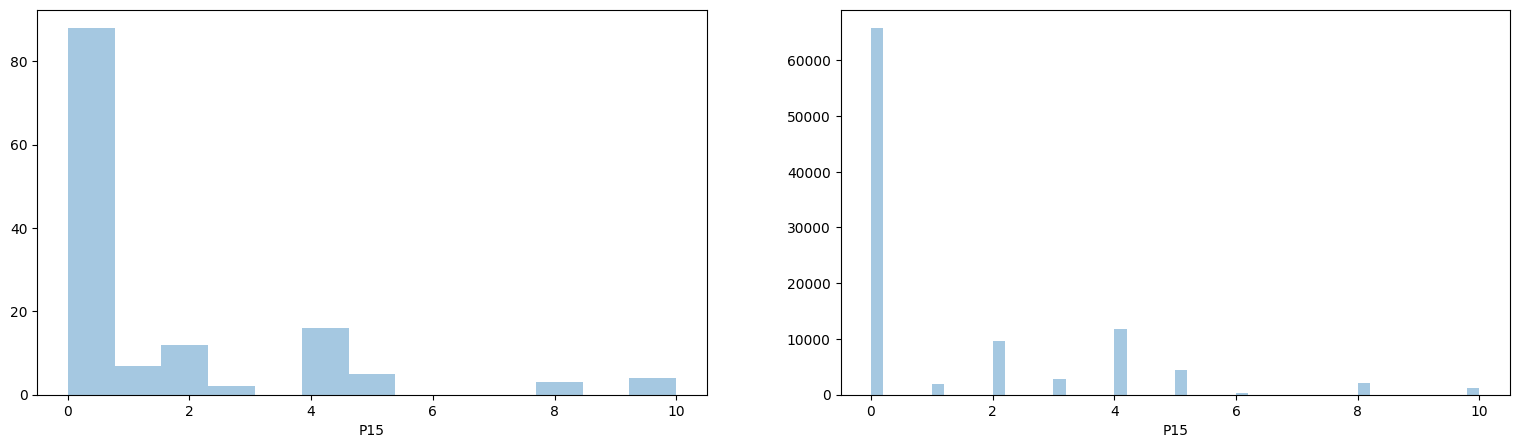

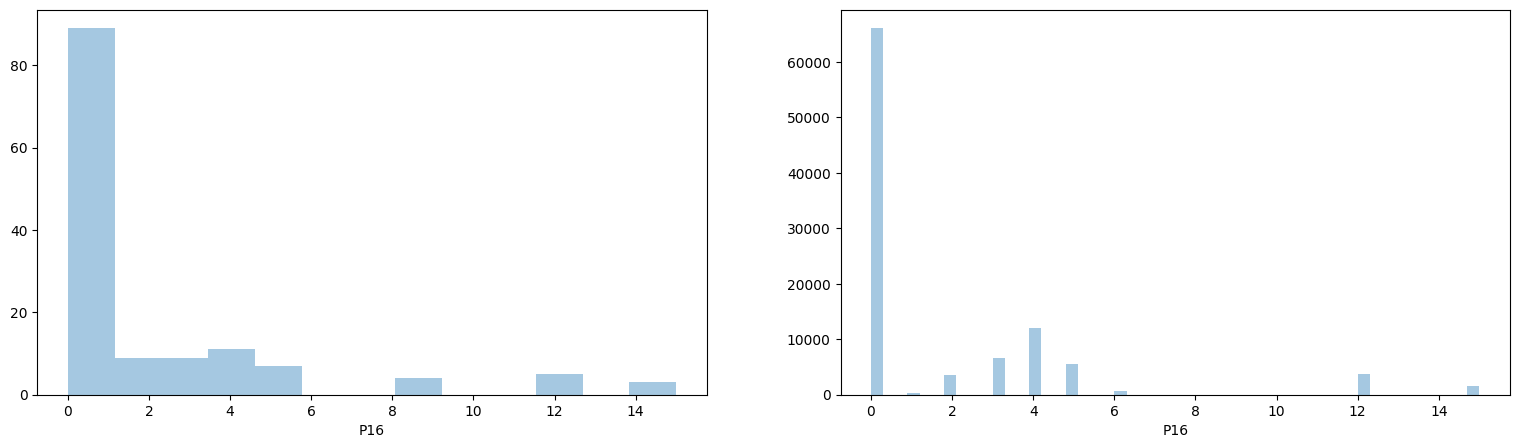

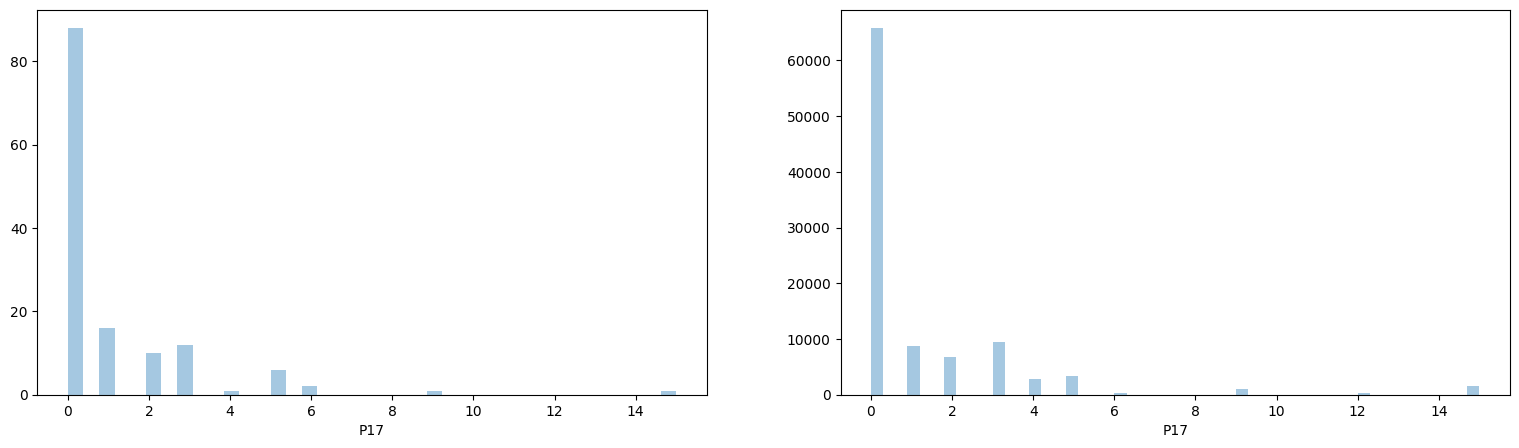

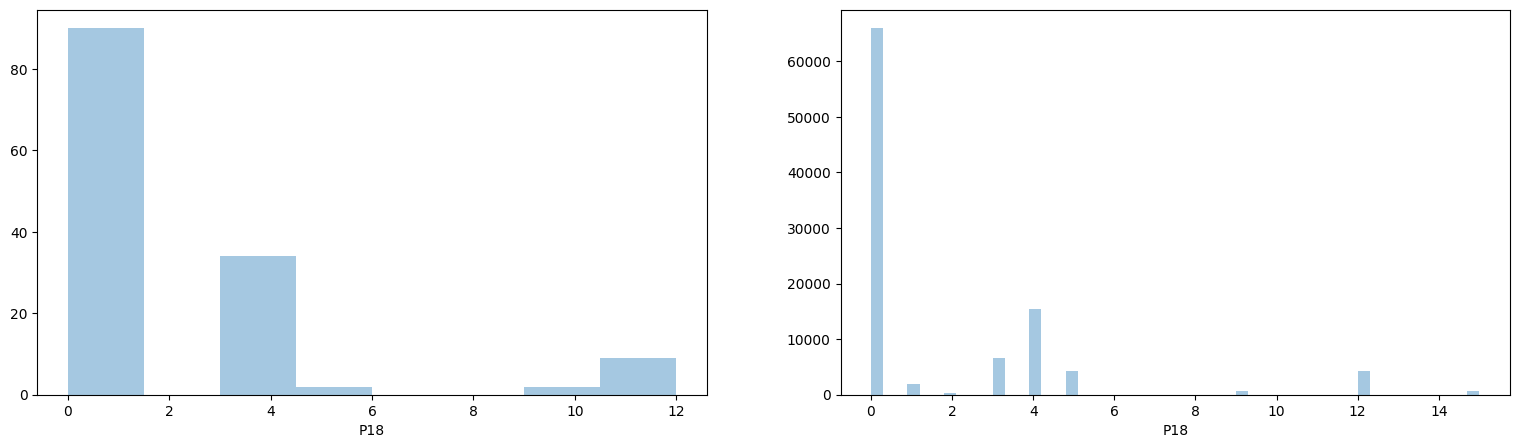

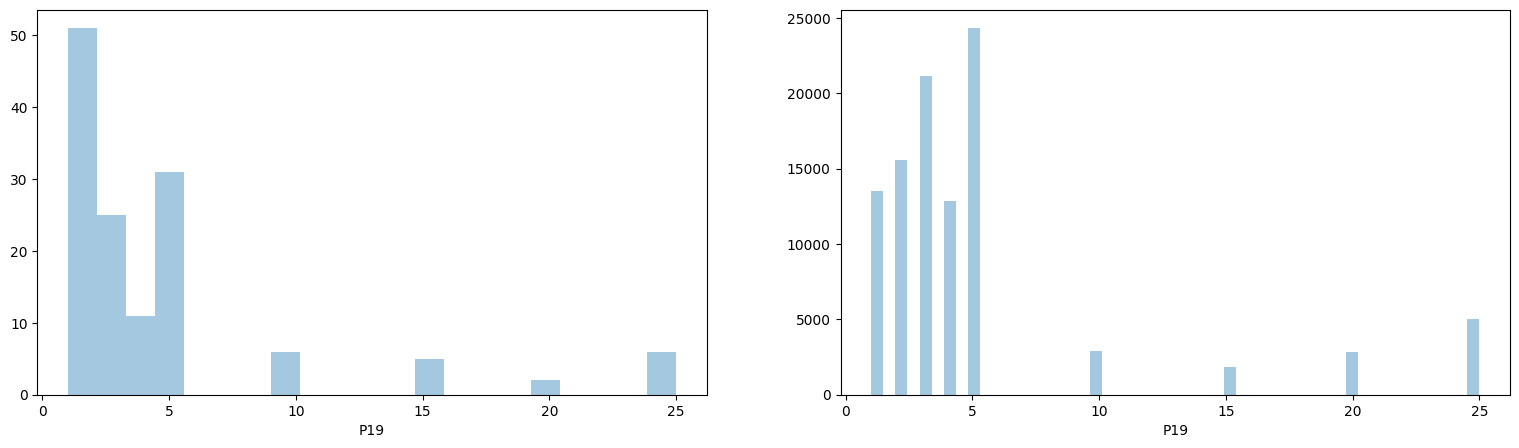

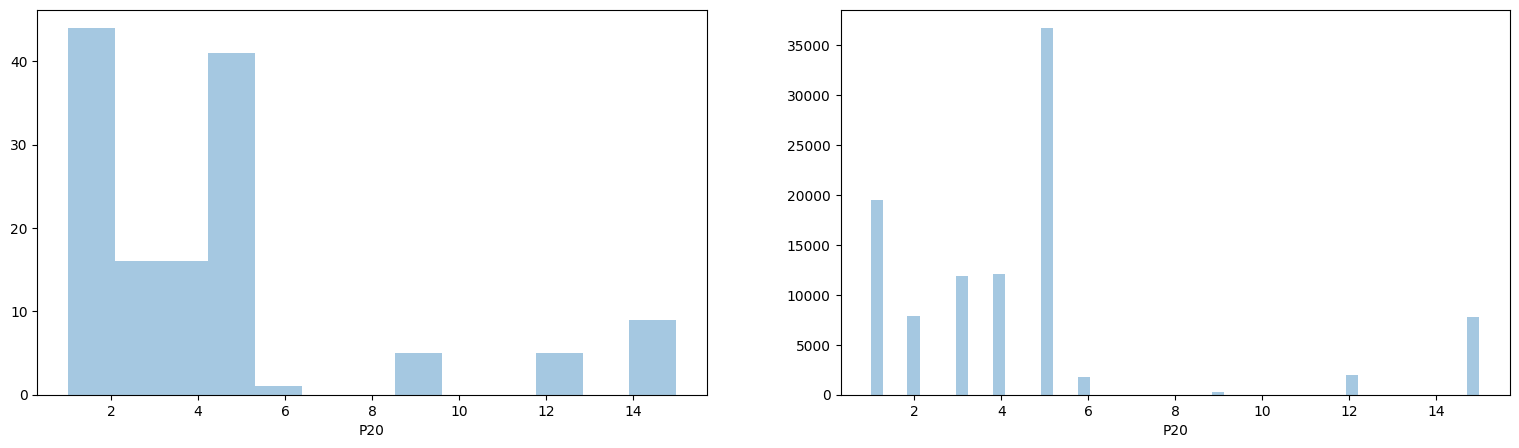

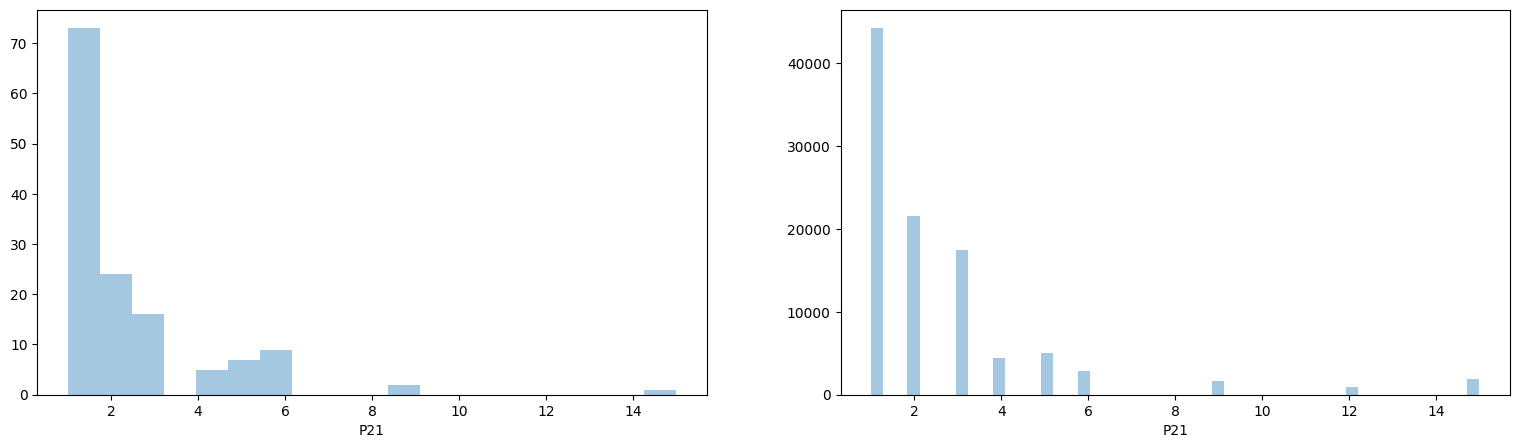

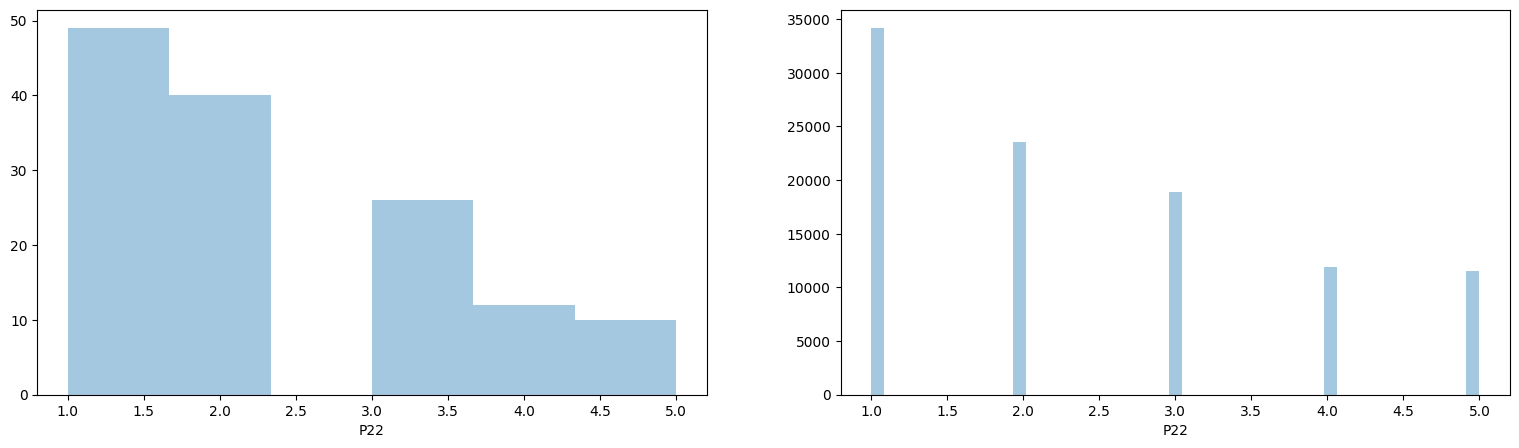

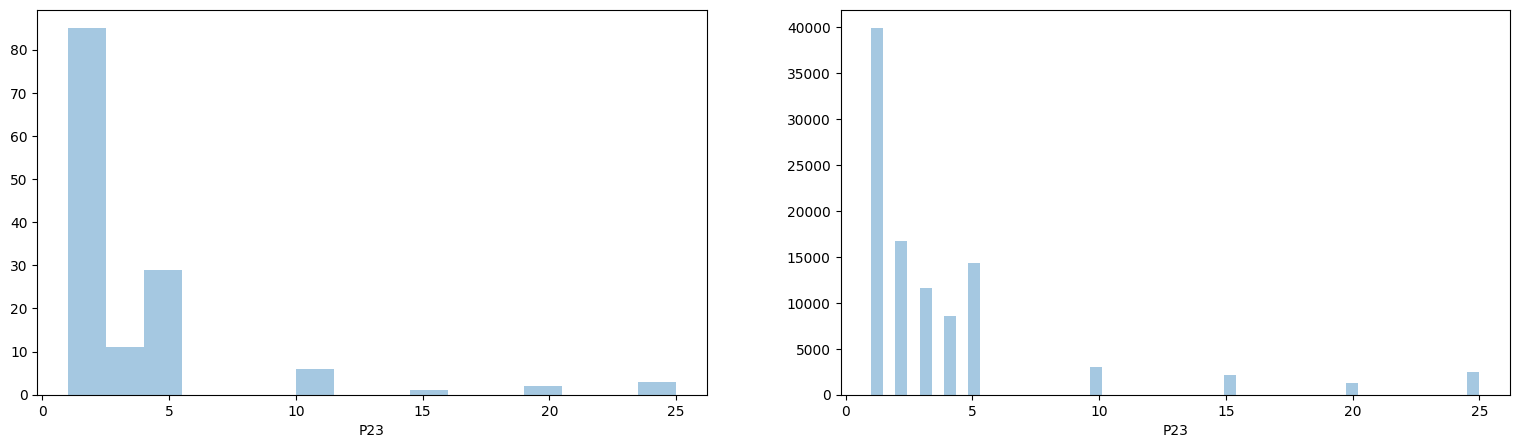

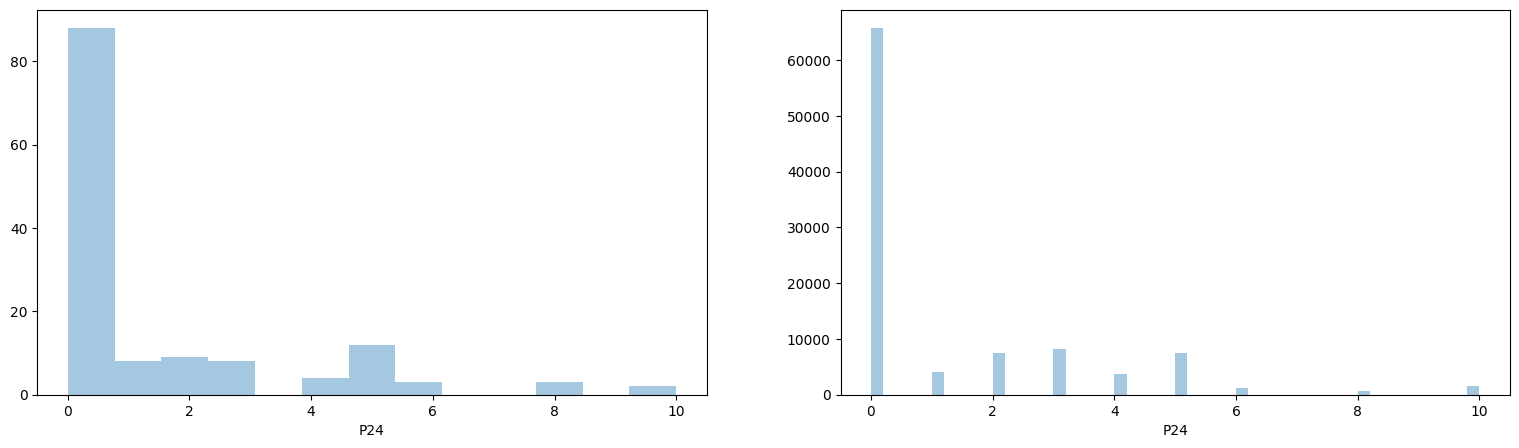

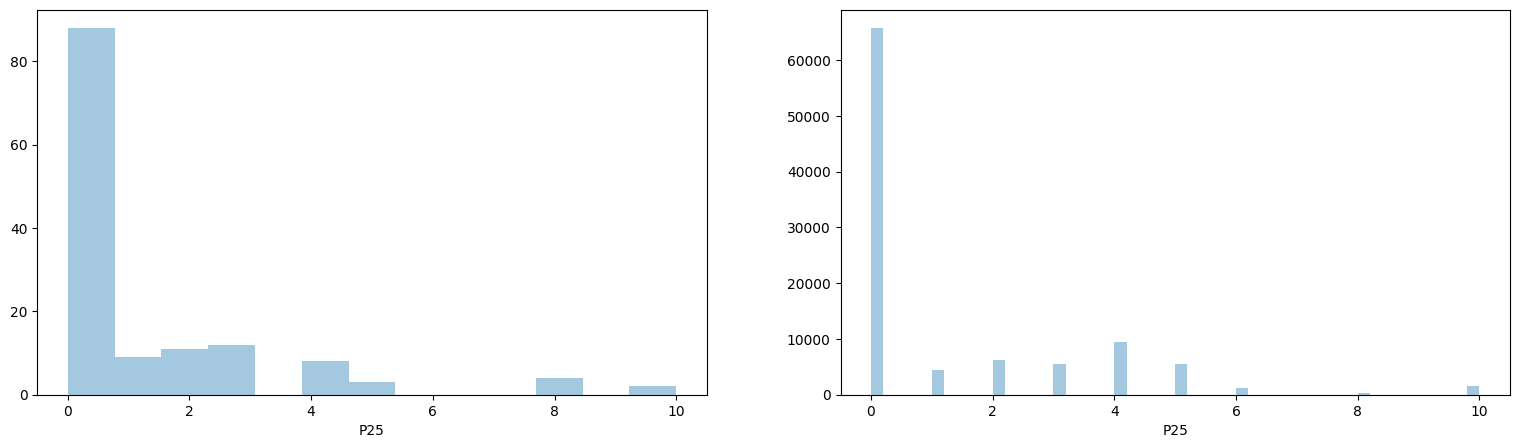

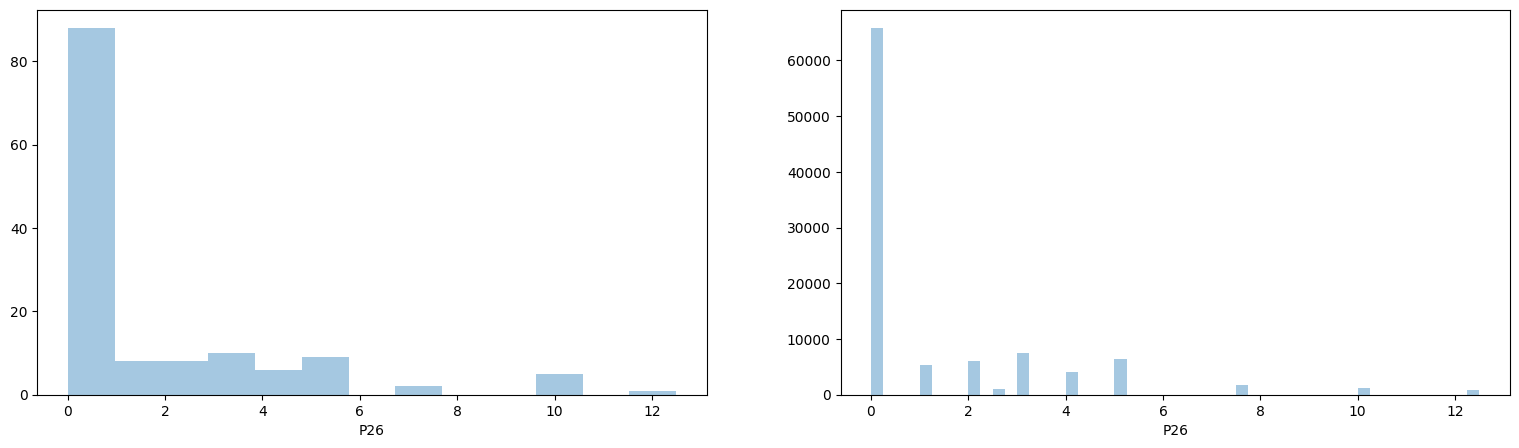

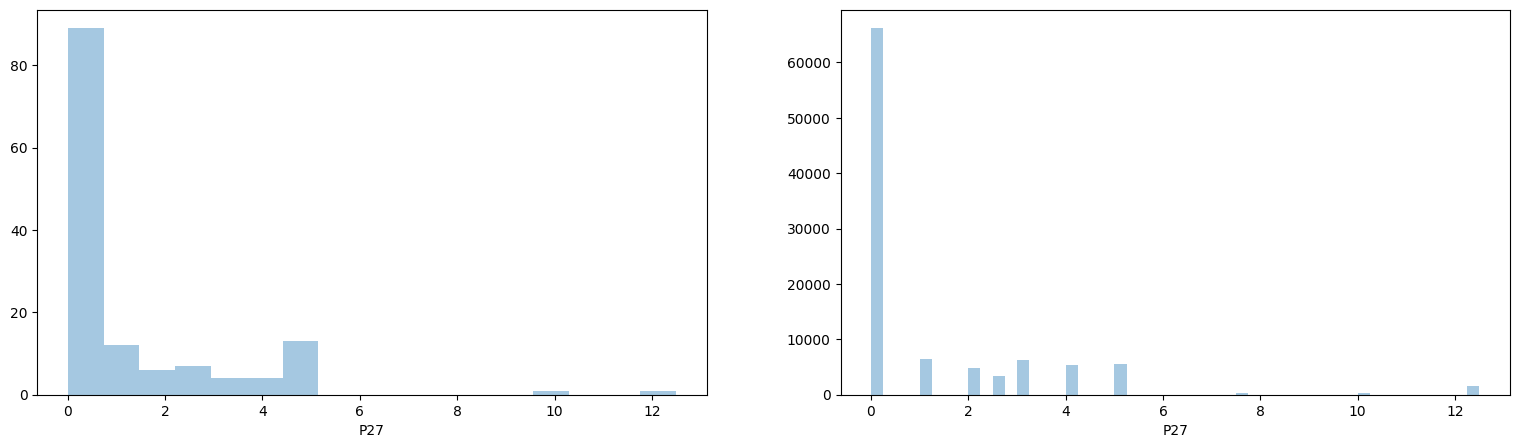

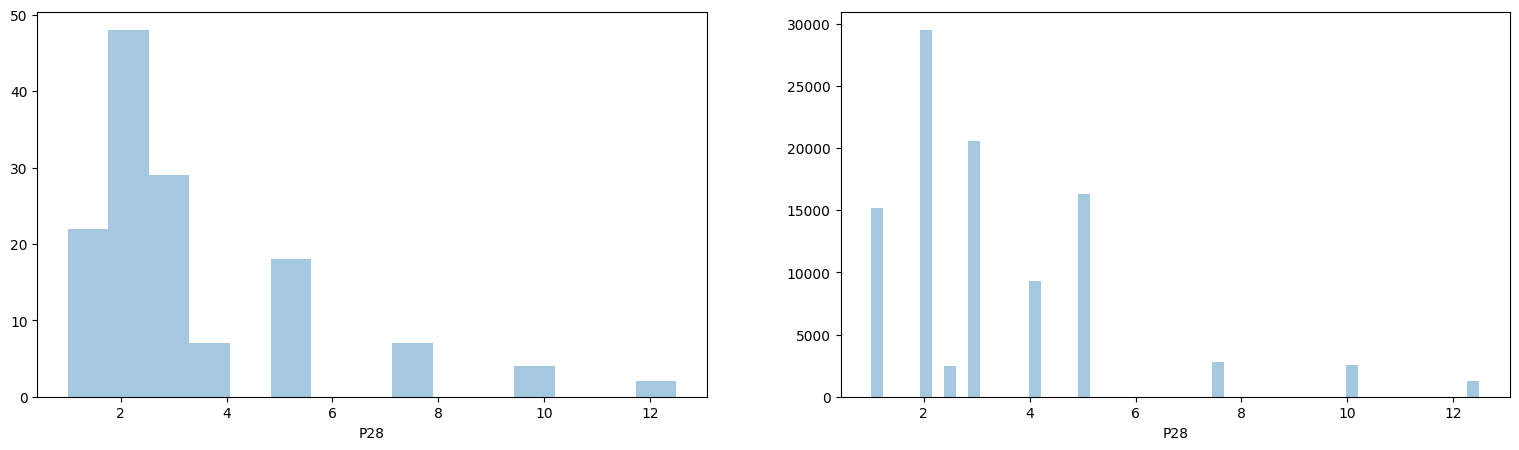

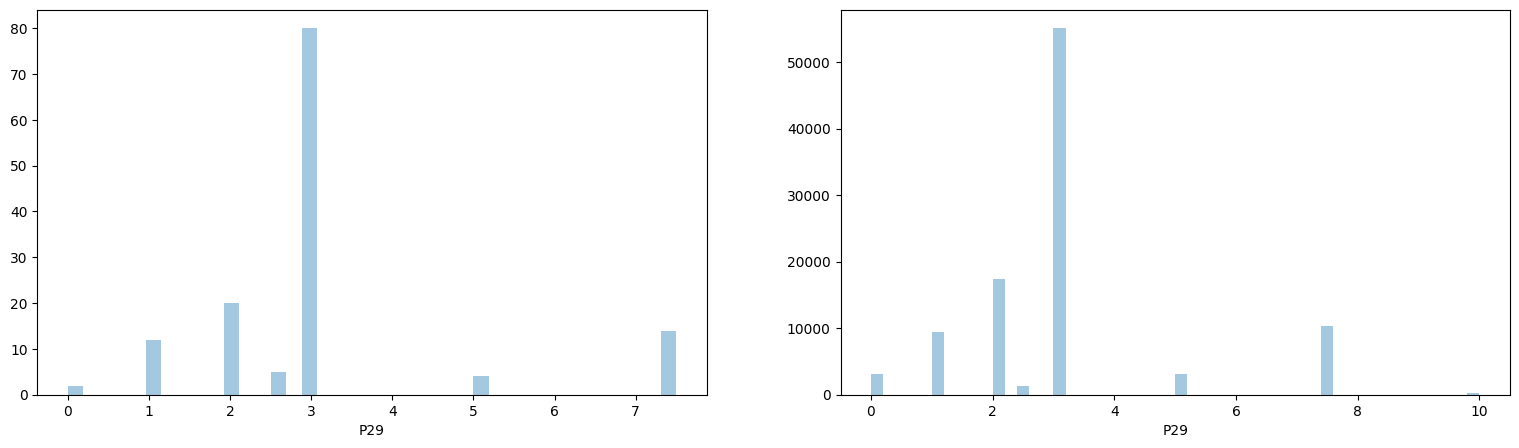

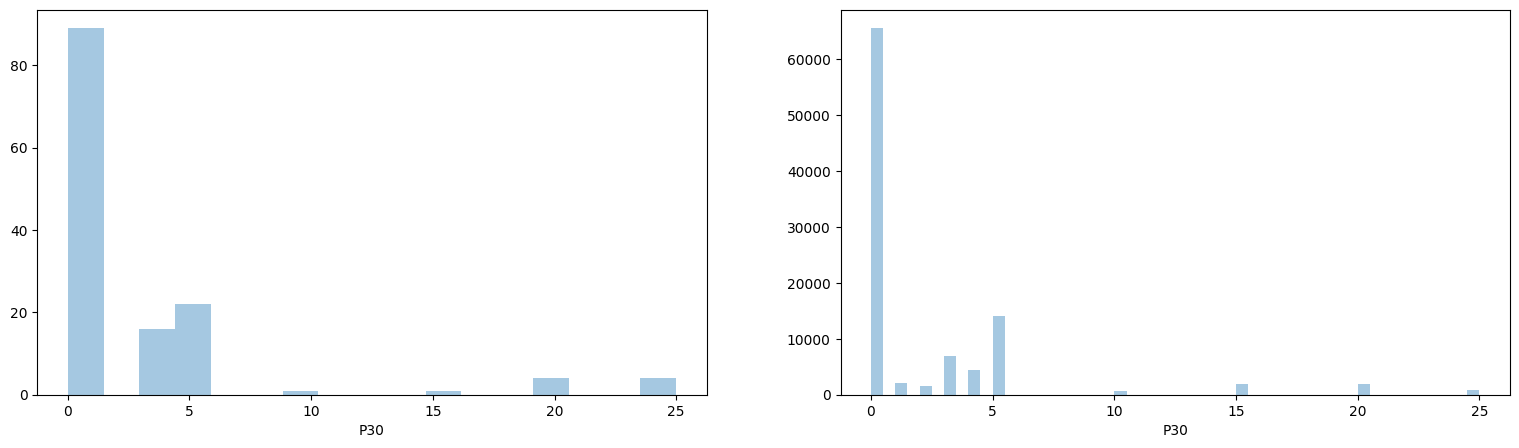

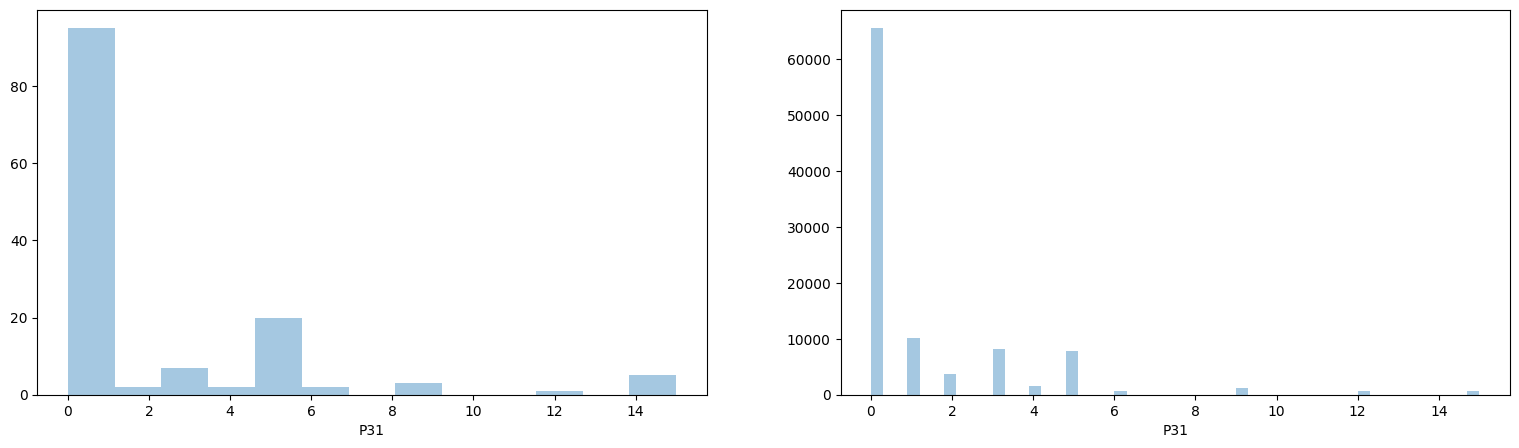

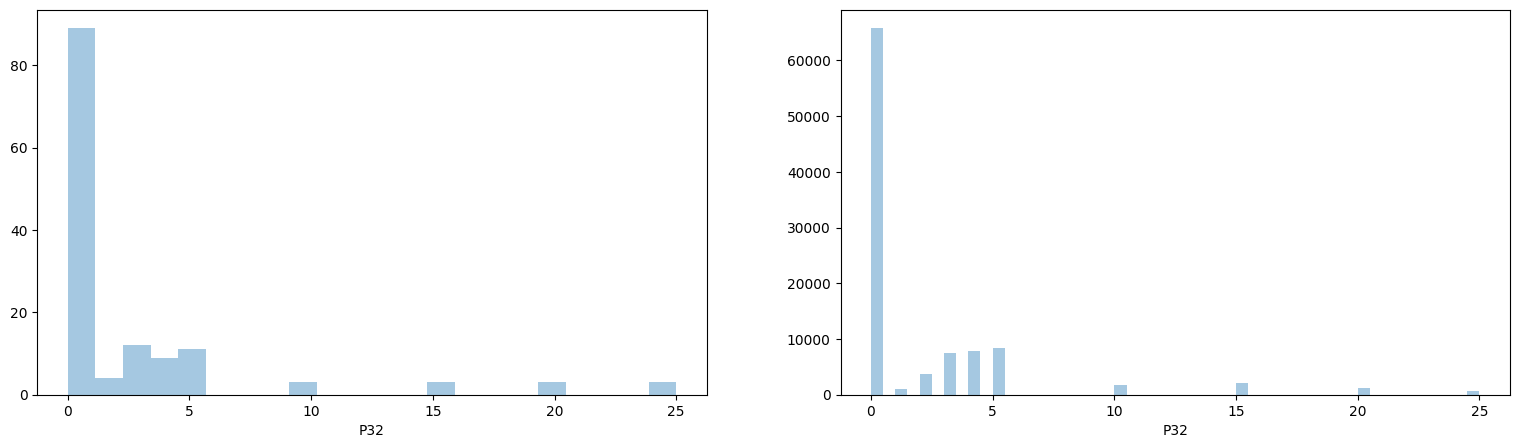

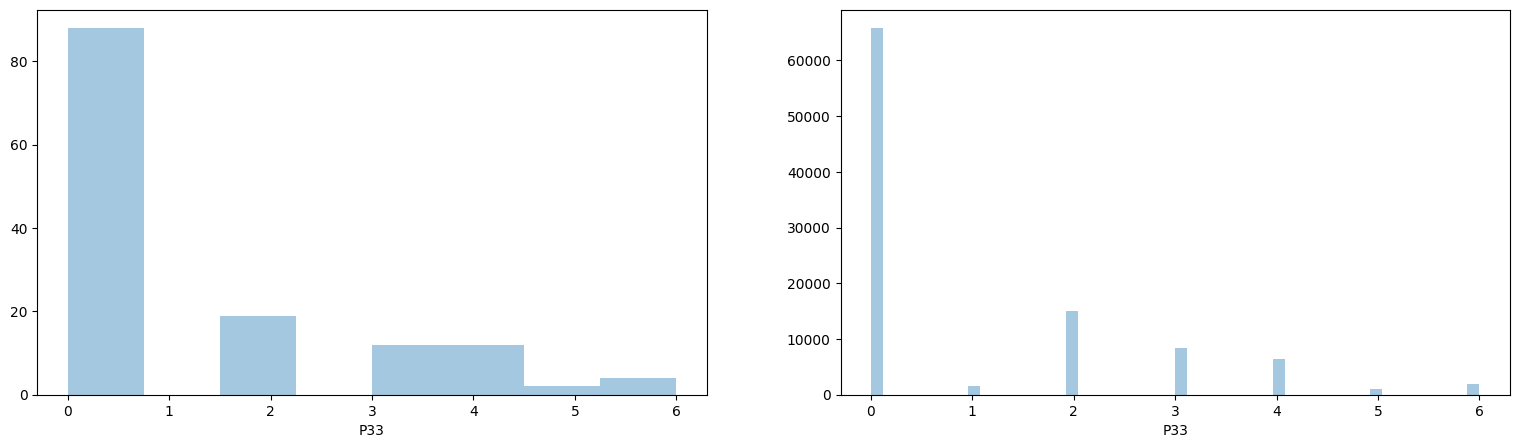

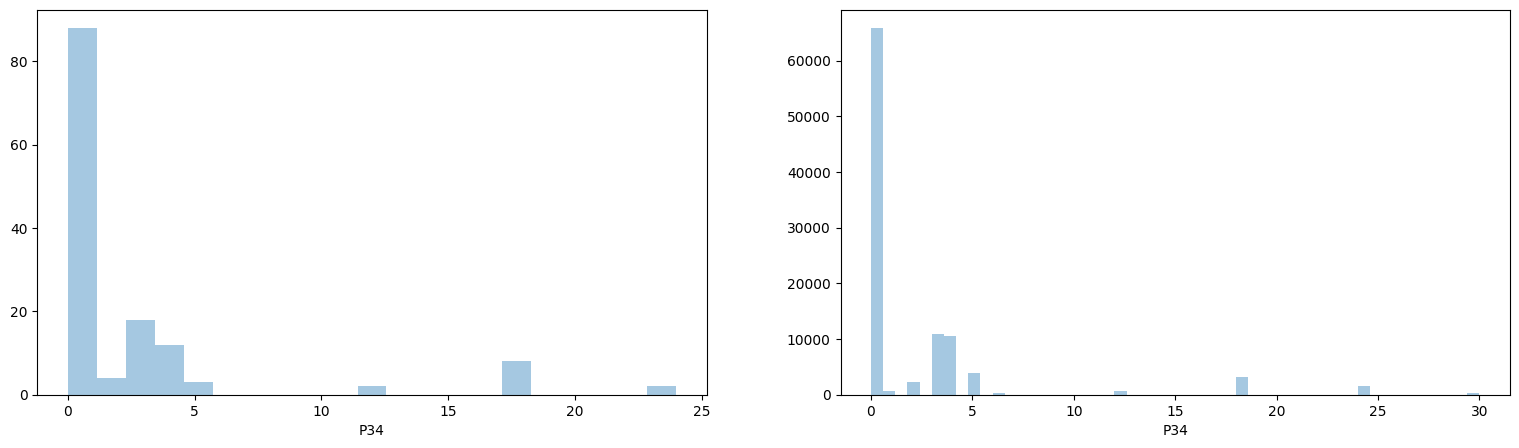

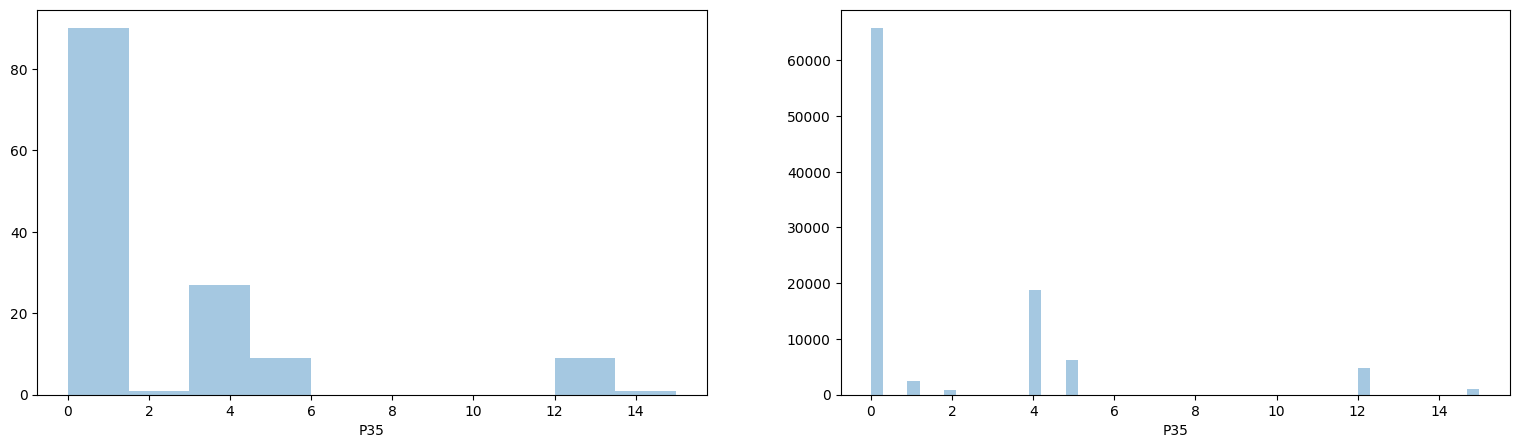

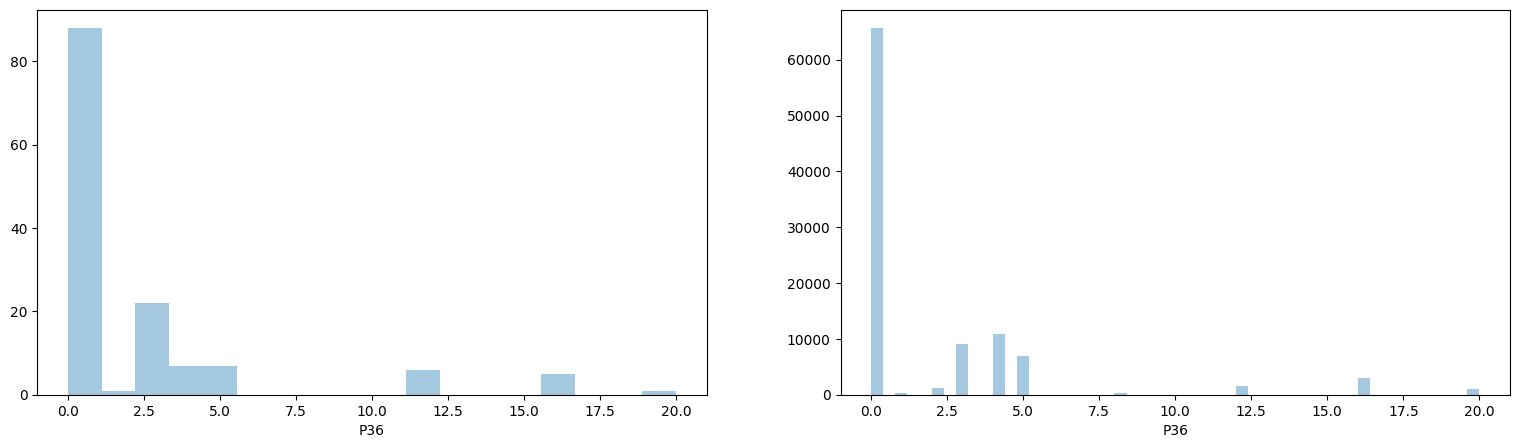

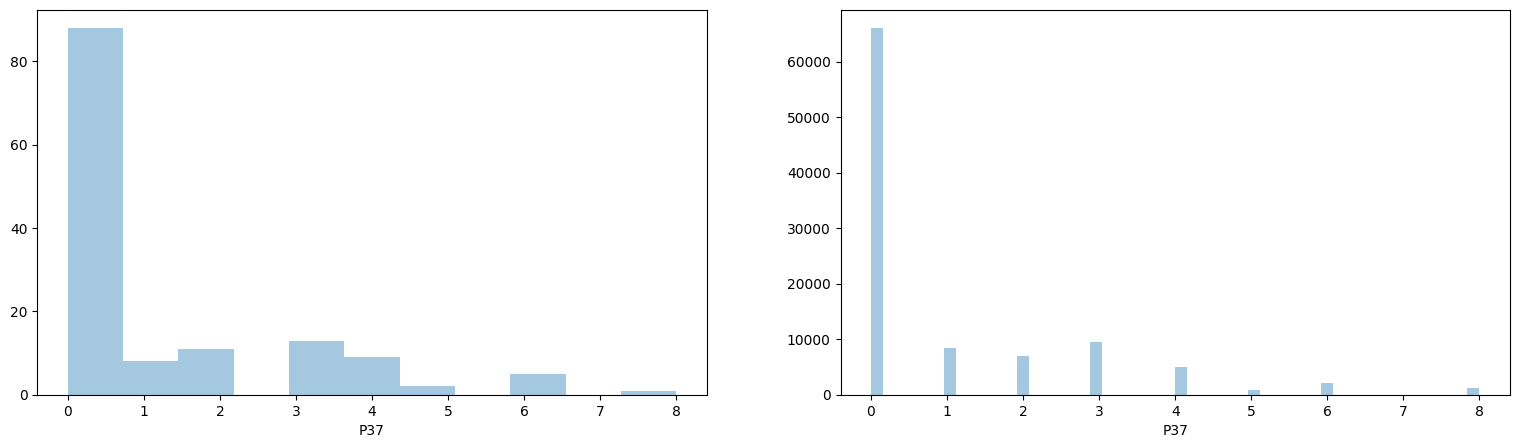

In [45]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False);
    g2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);
    fig.show()

In [46]:
df.dtypes

City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
Days Open     float64
dtype: object

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.git

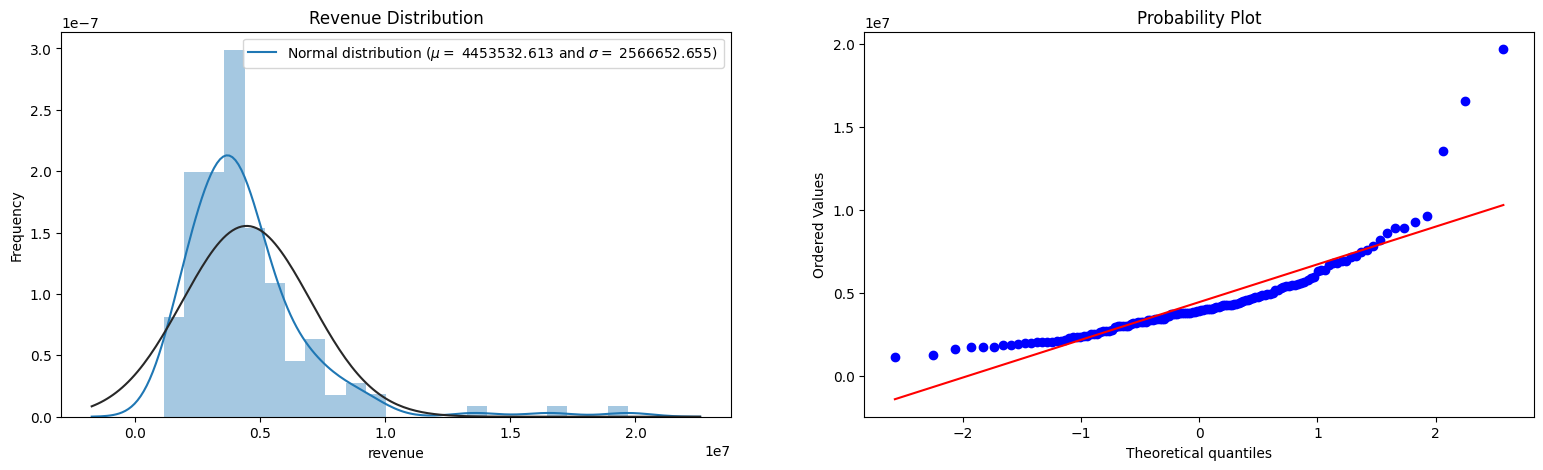

In [47]:
(mu, sigma) = norm.fit(df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['revenue'], plot=plt)
f.show();

In [48]:
df['revenue'] = np.log1p(df['revenue'])

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:4: SyntaxWarning: invalid escape sequence '\s'
  ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
C:\Users\HP\AppData\Local\Temp\ipykernel_21724\579411745.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.git

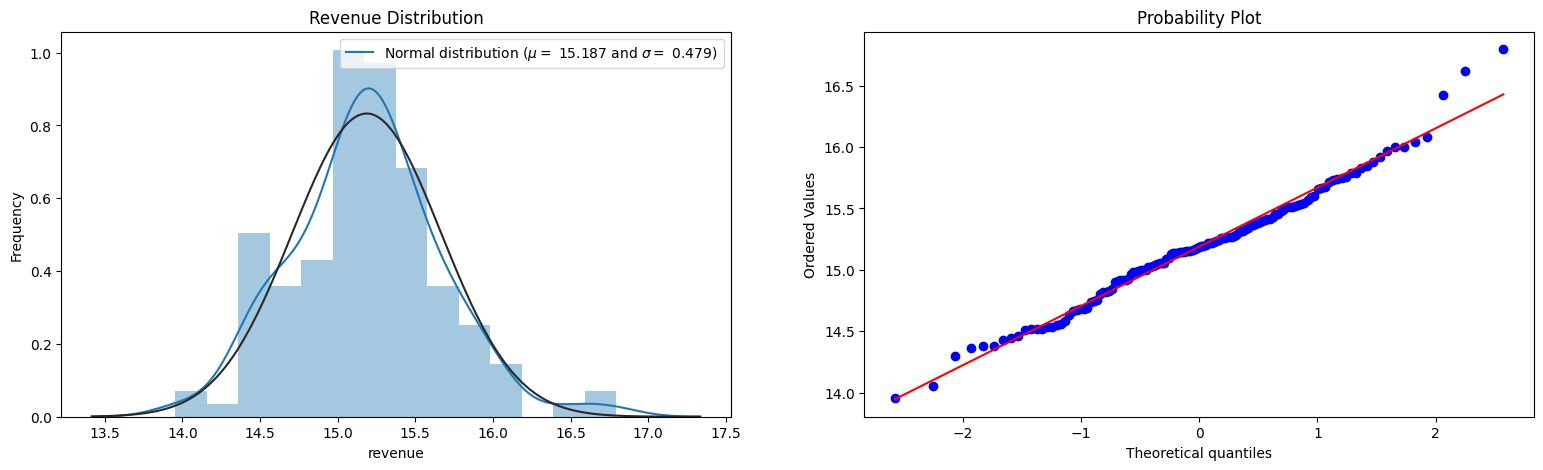

In [59]:
(mu, sigma) = norm.fit(df['revenue'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['revenue'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['revenue'], plot=plt)
f.show();

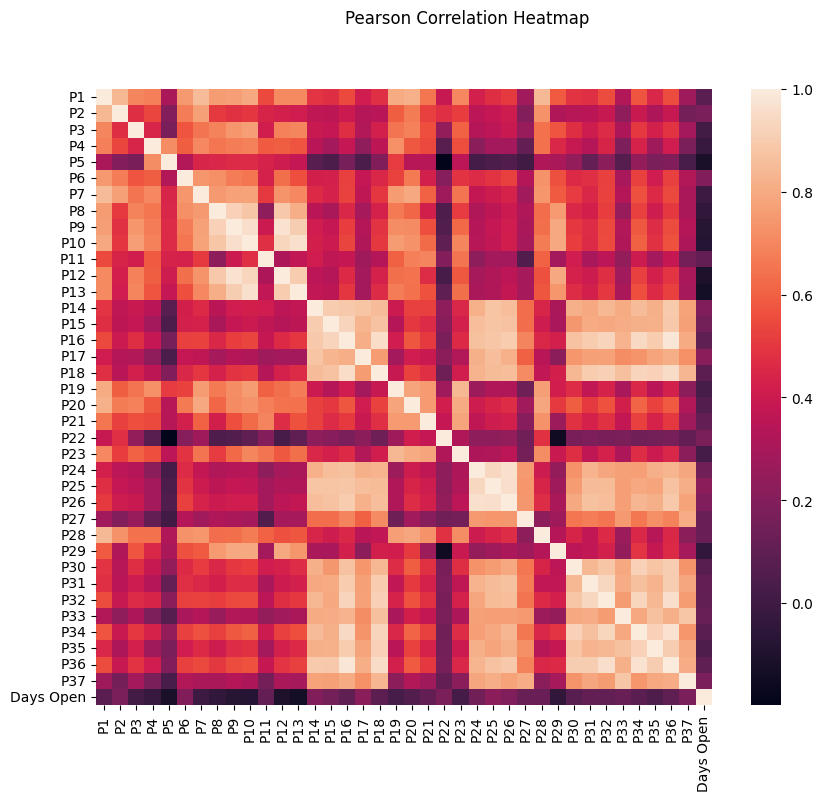

In [49]:
# Correlation between numeric features with revenue
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show();

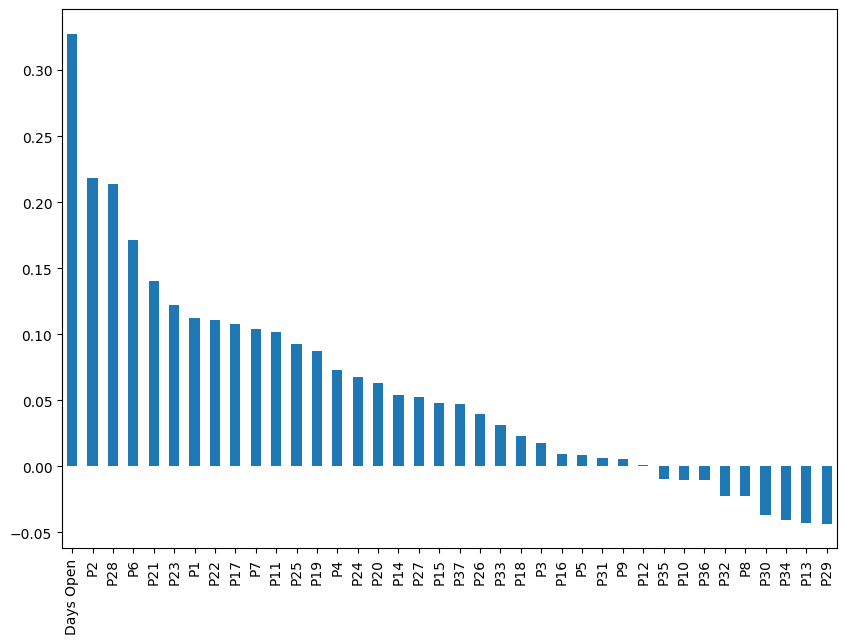

In [50]:
corr_with_revenue = df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show();

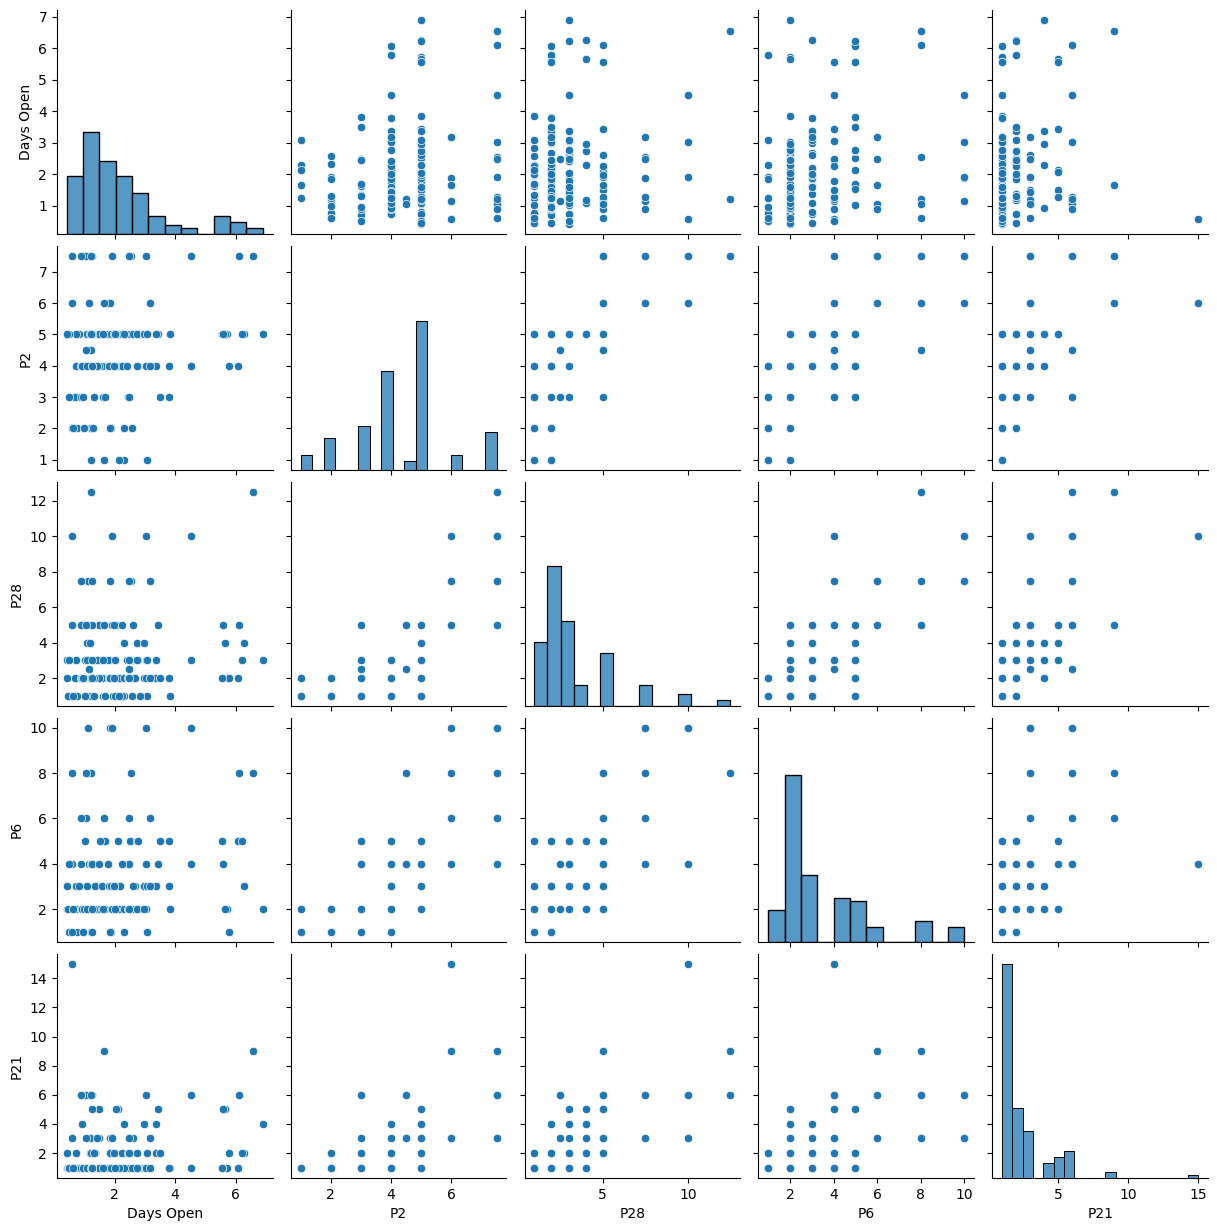

In [51]:
# Sélectionne uniquement les colonnes numériques
numerical_df = df.select_dtypes(include=[np.number])

# Récupère les 5 variables les plus corrélées avec 'revenue' (hors 'revenue' elle-même)
top5 = numerical_df.corr()['revenue'].abs().sort_values(ascending=False).index[1:6]

# Affiche les pairplots de ces variables
sns.pairplot(df[top5])
plt.show()

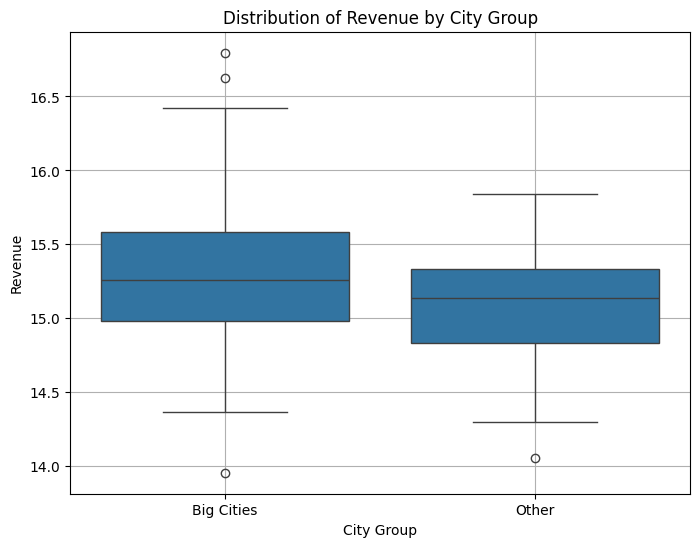

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='City Group', y='revenue', data=df)
plt.title('Distribution of Revenue by City Group')
plt.ylabel('Revenue')
plt.xlabel('City Group')
plt.grid(True)
plt.show()

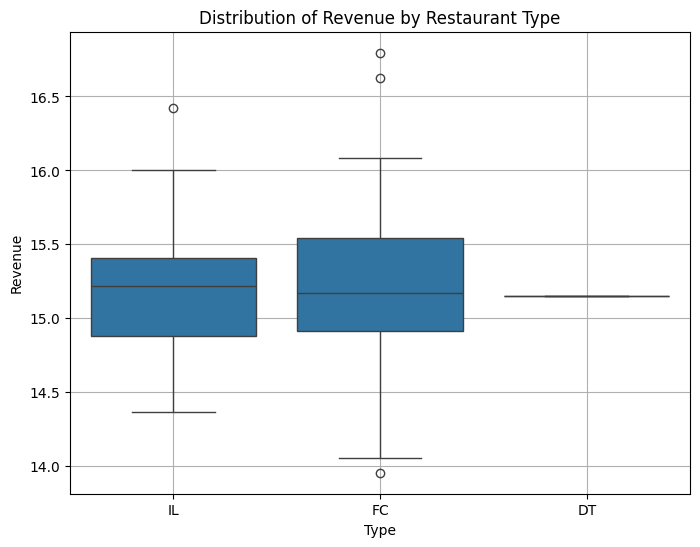

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='revenue', data=df)
plt.title('Distribution of Revenue by Restaurant Type')
plt.ylabel('Revenue')
plt.xlabel('Type')
plt.grid(True)
plt.show()


In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

imp_train = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
df[p_data] = np.round(imp_train.fit_transform(df[p_data]))
test_df[p_data] = np.round(imp_test.fit_transform(test_df[p_data]))

In [55]:
# drop_first=True for Dummy Encoding for object types, and drop_first=False for OHE
columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [56]:
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,revenue,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,...,4.0,3.0,4.0,15.547830,5.728,True,False,False,False,True
1,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,...,4.0,6.0,3.0,15.750379,2.594,True,False,False,True,False
2,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,...,4.0,4.0,6.0,14.535971,0.744,False,True,False,False,True
3,6.0,4.0,6.0,6.0,4.0,4.0,10.0,8.0,10.0,10.0,...,12.0,12.0,6.0,14.799651,1.145,False,True,False,False,True
4,3.0,4.0,3.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,...,4.0,3.0,3.0,15.278005,2.144,False,True,False,False,True


In [57]:

columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [58]:
df.to_csv("../training_data/train_transformed.csv", index=False)
test_df.to_csv("../training_data/test_transformed.csv", index=False)